# Customer Churn Project – Data Analysis 

## Brief

Customer Churn Analysis for a Subscription-based Business

- You have been employed by a subscription-based business, such as a streaming service or a software-as-a-service (SaaS) company, to analyse customer churn. The company is facing a significant challenge with retaining customers, and they want you to identify key factors influencing churn and provide actionable insights to reduce customer attrition. 

- You will be provided with a dataset containing a variety of information including customer demographics, usage patterns, subscription plans, customer support interactions, and the status (churned or active) of each customer. The dataset uses 'Churn' to indicate whether the customer has churned (1) or is still active (0).


## Insights and Recommendations

The variables with the greatest observed influence on customer churn were Account Age, Average Viewing Duration, Viewing Hours per Week, and Content Downloads per Month, as indicated by the correlation heatmap and single-predictor linear regression analysis.

- Account Age: Customers with older accounts are less likely to churn, suggesting that churn risk is highest early in the customer lifecycle.

- Average Viewing Duration: Customers with shorter average viewing durations are more likely to churn, indicating lower engagement with the platform.

- Viewing Hours per Week: Customers with fewer weekly viewing hours show a higher likelihood of churn compared to more active users.

- Content Downloads per Month: Customers who download less content each month are more likely to churn, suggesting weaker offline or repeat engagement.

While none of these variables exhibited a strong individual relationship with churn (correlations ranged from approximately –0.13 to –0.20), their combined effect provides a clearer indication of churn risk. In particular, customers with newer accounts and consistently low engagement metrics (short viewing durations and low weekly viewing hours) appear to be at the highest risk of churn.

Based on these insights, the following retention strategies are recommended:

- Early Account Lifecycle Engagement Programmes: 
    - Target new customers during the first few months of their subscription through onboarding emails, in-app tutorials, etc. Encouraging new customers to download content early in their customer journey may further increase engagement and perceived value. These initiatives help customers quickly recognise the benefits of the service and can reduce early churn associated with short account age.

- Low-Engagement Re-engagement Strategies: 
    - Identify customers with low average viewing duration or declining weekly viewing hours and provide personalised content suggestions, reminders of unfinished series, or notifications about newly released content aligned with their preferences.

## Model Overviews

- Given the artificial and evenly distributed dataset, both linear and tree-based approaches show limited predictive power (accurately predicting both  churn and non-churn customers).

- This limitation reflects the lack of strong underlying patterns in the data rather than shortcomings in the modelling techniques themselves.

### Ensemble Averaging Model
- The Ensemble Averaging Model combines the outputs of four bivariate linear regression models, each fitted to one of the most impactful numerical features identified during the exploratory analysis stage: Account Age, Average Viewing Duration, Viewing Hours per Week, and Content Downloads per Month. The predicted churn values from each of these individual regressions/models was averaged to produce a continuous churn risk score for each customer.

- The model was trained on the majority of the dataset and tested on a smaller, separated subset to validate its performance.

- Inspection of the ensemble score distribution showed that predicted churn values were tightly clustered around the base churn rate (~0.181), indicating limited separation between churners and non-churners (in more realistic data we could expect to see a larger distribution).

- A baseline classification threshold equal to the average churn rate in the training data was applied. This threshold choice allowed the model to meaningfully predict both churn and non-churn outcomes, prioritising recall of churners at the expense of overall model accuracy.

- The threshold can be adjusted on the model’s output to optimize the balance between correctly identifying likely churners and minimizing false positives (threshold optimisation).

- While the model demonstrates relatively high recall for churned customers (77%), it also produces a substantial number of false positives. From a business perspective, this trade-off may be acceptable, as customers incorrectly flagged as at risk can still be targeted with low-cost retention strategies such as engagement reminders (reminding customers that they can download content).

- Over time, regularly retraining the model with updated customer data can improve its predictive accuracy and reduce false positives.


### Decision Tree Model
- A Decision Tree classifier was implemented as an alternative, non-linear modelling approach.

- The dataset was split into training and test sets using an 80/20 ratio, and the depth of the tree was initially constrained to four levels to reduce overfitting.

- The initial model defaulted to predicting the majority class (non-churn), achieving 82% accuracy but failing to identify any churned customers. This was caused by class imbalance in the dataset — approximately 82% of records are non-churners — rather than a flaw in the algorithm itself.

- To address this, the `class_weight='balanced'` parameter was introduced, which reweights the training penalty so that misclassifying a churner is treated as proportionally more costly. This successfully prompted the model to begin identifying churners, improving churn recall to 60% at a depth of four, and 67% at a depth of six.

- Overall accuracy decreased following this change (from 82% to ~66–68%), which is expected — the model is now making meaningful predictions on the minority class rather than defaulting to the majority.

- Increasing tree depth from four to six produced only marginal gains in F1-score (0.40 to 0.41), suggesting the single decision tree architecture is approaching its performance ceiling and that further improvement would likely require an ensemble method such as a random forest.



### Ways to Improve the Project 

- Play with the threshold 
- Add in the one-hot encoding
- Explore a Random Forest Classifier option


------------------------------------------------------------------
## Start of Project
------------------------------------------------------------------

## 1. Define the Problem and Goals

- The bussiness is struggling to retain customers/has a high churn rate, this is affecting its profitability.
- Investigate what factors are influencing churn.
- Provide insights to reduce customer attriction.
- Create model to predict customer churn.

## 2. Load and Inspect Data / Imports
Gain a brief overview of the dataset/build a mental model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme()


In [2]:
df_churn = pd.read_csv('training_set.csv')

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [4]:
df_churn.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


## 3. Check Data Quality

Look for structural problems:

- Missing values
- Duplicates
- Incorrect data types
- Mixed formats (e.g., strings mixed with numbers)
- Impossible values (negative ages, future dates, etc.)


In [5]:
df_churn.describe(include = 'all')

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
count,243787.000000,243787.000000,243787.000000,243787,243787,243787,243787,243787,243787,243787.000000,...,243787.000000,243787,243787.000000,243787.000000,243787,243787.000000,243787,243787,243787,243787.000000
unique,NaN,NaN,NaN,3,4,2,3,2,4,NaN,...,NaN,5,NaN,NaN,2,NaN,2,2,243787,NaN
top,NaN,NaN,NaN,Standard,Electronic check,No,Both,No,Computer,NaN,...,NaN,Comedy,NaN,NaN,Female,NaN,Yes,Yes,CB6SXPNVZA,NaN
freq,NaN,NaN,NaN,81920,61313,121980,81737,122035,61147,NaN,...,NaN,49060,NaN,NaN,121930,NaN,122085,122180,1,NaN
mean,60.083758,12.490695,750.741017,NaN,NaN,NaN,NaN,NaN,NaN,20.502179,...,24.503513,NaN,3.002713,4.504186,NaN,12.018508,NaN,NaN,NaN,0.181232
std,34.285143,4.327615,523.073273,NaN,NaN,NaN,NaN,NaN,NaN,11.243753,...,14.421174,NaN,1.155259,2.872548,NaN,7.193034,NaN,NaN,NaN,0.385211
min,1.000000,4.990062,4.991154,NaN,NaN,NaN,NaN,NaN,NaN,1.000065,...,0.000000,NaN,1.000007,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,30.000000,8.738543,329.147027,NaN,NaN,NaN,NaN,NaN,NaN,10.763953,...,12.000000,NaN,2.000853,2.000000,NaN,6.000000,NaN,NaN,NaN,0.000000
50%,60.000000,12.495555,649.878487,NaN,NaN,NaN,NaN,NaN,NaN,20.523116,...,24.000000,NaN,3.002261,4.000000,NaN,12.000000,NaN,NaN,NaN,0.000000
75%,90.000000,16.238160,1089.317362,NaN,NaN,NaN,NaN,NaN,NaN,30.219396,...,37.000000,NaN,4.002157,7.000000,NaN,18.000000,NaN,NaN,NaN,0.000000


In [6]:
# Check for missing values
df_churn.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

There are no missing values.

In [ ]:
# Check for duplicated rows
# duplicated() returns a boolean series, a true/false value fror each row any() chekcs if any of those vales are true.
df_churn.duplicated().any()


np.False_

In [ ]:
# sum() counts number of duplicated rows
df_churn.duplicated().sum()

np.int64(0)

In [ ]:
# Check for duplicated customer IDs, ensure customers have not been entered into database multiple times.
df_churn['CustomerID'].duplicated().any()

np.False_

There are no duplicated rows or customer IDs.

In [28]:
# Check for negative values
df_churn_numeric = df_churn.select_dtypes(include=[float,int])

(df_churn_numeric < 0).sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
Churn                       0
dtype: int64

There are no negative values.

In [10]:
# Check for mixed data formats
df_churn.apply(lambda col: col.map(type).nunique())
# For each columns in df_churn, apply this lambda expression.
# Replace every value with its Python type, count how many types appear, return the count.

AccountAge                  1
MonthlyCharges              1
TotalCharges                1
SubscriptionType            1
PaymentMethod               1
PaperlessBilling            1
ContentType                 1
MultiDeviceAccess           1
DeviceRegistered            1
ViewingHoursPerWeek         1
AverageViewingDuration      1
ContentDownloadsPerMonth    1
GenrePreference             1
UserRating                  1
SupportTicketsPerMonth      1
Gender                      1
WatchlistSize               1
ParentalControl             1
SubtitlesEnabled            1
CustomerID                  1
Churn                       1
dtype: int64

There is no mixed data.

# 4. Univariate Analysis

Churn
0    199605
1     44182
Name: count, dtype: int64


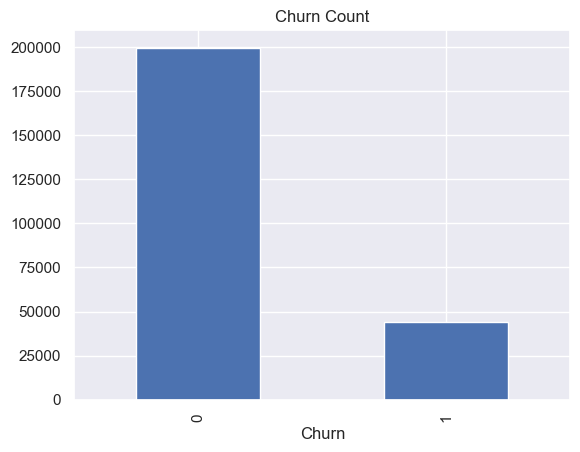

Gender
Female    121930
Male      121857
Name: count, dtype: int64


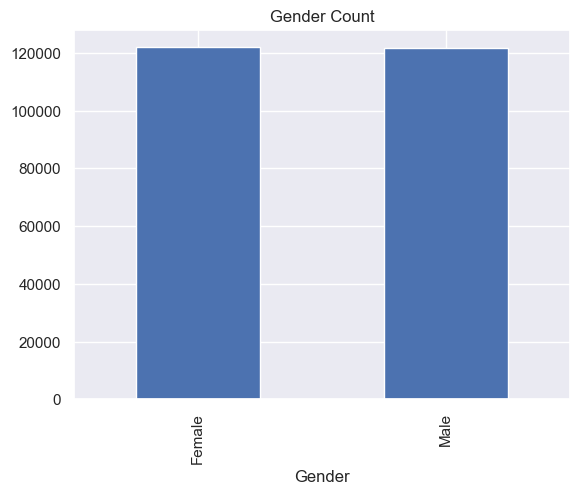

SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64


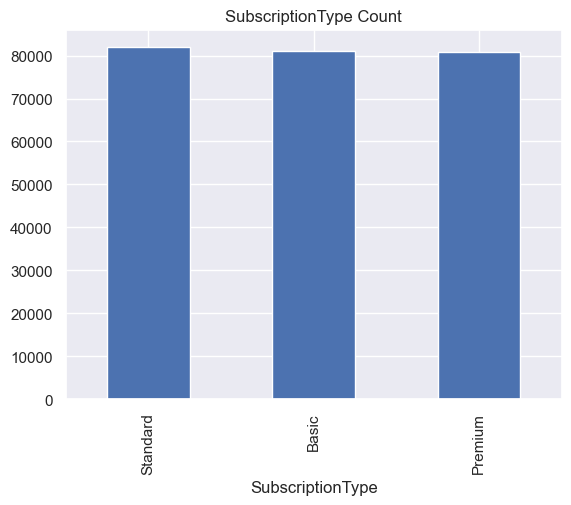

GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64


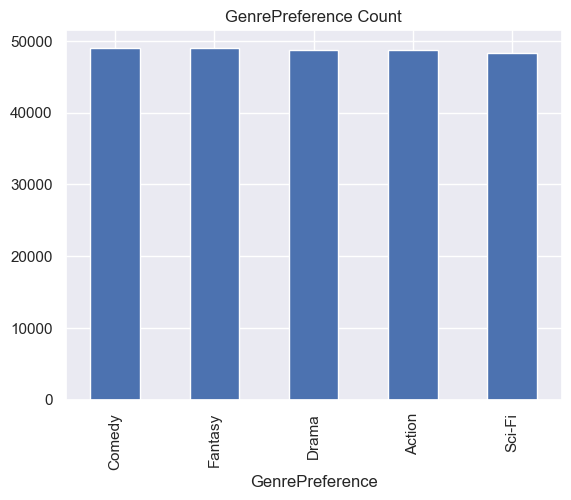

PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64


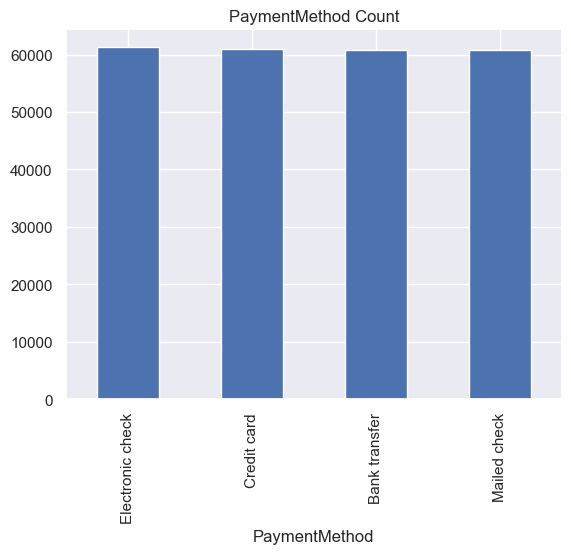

In [11]:
# Bar charts for catergorical data

# Churn
print(df_churn['Churn'].value_counts())
df_churn['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Count')
plt.show()

# Gender
print(df_churn['Gender'].value_counts())
df_churn['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Count')
plt.show()

# SubscriptionType
print(df_churn['SubscriptionType'].value_counts())
df_churn['SubscriptionType'].value_counts().plot(kind='bar')
plt.title('SubscriptionType Count')
plt.show()

# GenrePreference
print(df_churn['GenrePreference'].value_counts())
df_churn['GenrePreference'].value_counts().plot(kind='bar')
plt.title('GenrePreference Count')
plt.show()

# Payment Method
print(df_churn['PaymentMethod'].value_counts())
df_churn['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('PaymentMethod Count')
plt.show()

The data shown in the above 5 bar charts is extremely evenly distributed. This is probably not representative of a real company.

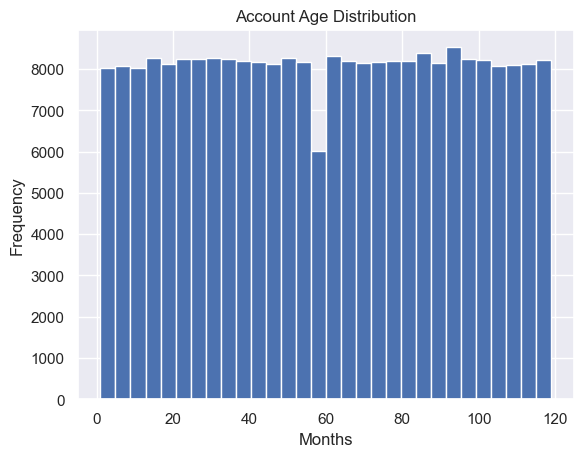

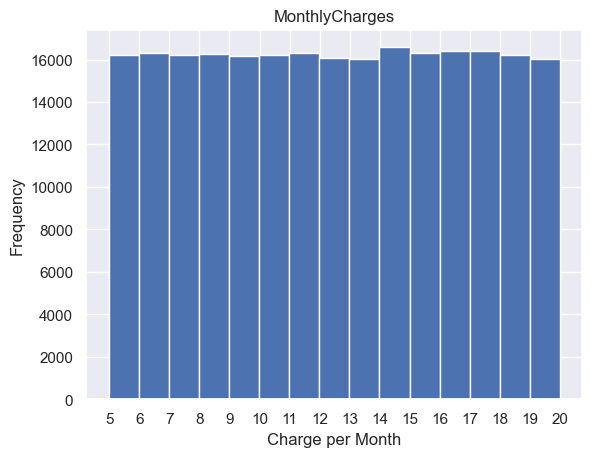

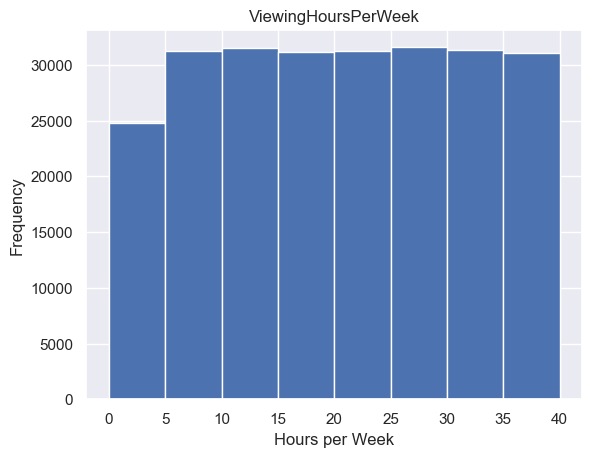

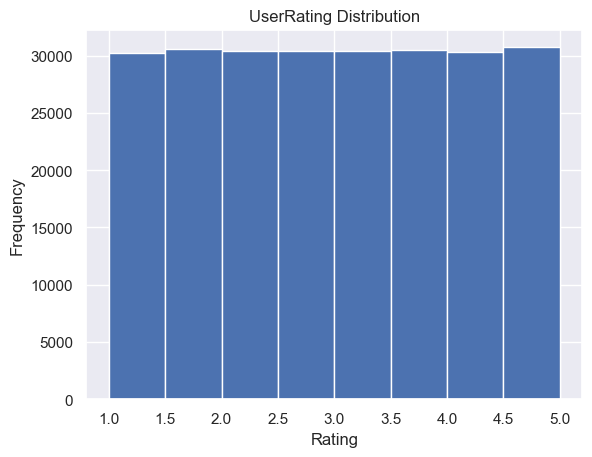

In [12]:
# Histograms for numeric / continuous data

# Account Age Distribution
df_churn['AccountAge'].plot(kind = 'hist', bins = 30)
plt.title('Account Age Distribution')
plt.xlabel('Months')
plt.show()

# Monthly Charges
df_churn['MonthlyCharges'].plot(kind = 'hist', bins = 15)
plt.title('MonthlyCharges')
plt.xlabel('Charge per Month')
plt.xticks((range(5, 21, 1)))
plt.show()

# Viewing Hours per Week
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
df_churn['ViewingHoursPerWeek'].plot(kind = 'hist', bins = bins)
plt.xticks(bins)
plt.title('ViewingHoursPerWeek')
plt.xlabel('Hours per Week')
plt.show()

# User Rating
df_churn['UserRating'].plot(kind = 'hist', bins = 8)
plt.title('UserRating Distribution')
plt.xlabel('Rating')
plt.show()

The data shown in the above 4 histograms is also extremely evenly distributed. This is probably not representative of a real company.

## 5. Bivariate Analysis

Explore how variables relate to each other, especially the target variable (churn).

Purpose: Identify relationships worth modeling or features to engineer.

In [13]:
print(df_churn.groupby('Gender', observed = True)['Churn'].mean())
print('\n')

print(df_churn.groupby('SubscriptionType', observed = True)['Churn'].mean())
print('\n')

print(df_churn.groupby('GenrePreference', observed = True)['Churn'].mean())
print('\n')

print(df_churn.groupby('PaymentMethod', observed = True)['Churn'].mean())
print('\n')

print(df_churn.groupby('ContentType', observed = True)['Churn'].mean())
print('\n')

print(df_churn.groupby('SubtitlesEnabled', observed = True)['Churn'].mean())
print('\n')

print(df_churn.groupby('ParentalControl', observed = True)['Churn'].mean())

Gender
Female    0.178356
Male      0.184109
Name: Churn, dtype: float64


SubscriptionType
Basic       0.196521
Premium     0.162775
Standard    0.184314
Name: Churn, dtype: float64


GenrePreference
Action     0.165866
Comedy     0.193416
Drama      0.178709
Fantasy    0.176734
Sci-Fi     0.191444
Name: Churn, dtype: float64


PaymentMethod
Bank transfer       0.179269
Credit card         0.162251
Electronic check    0.192471
Mailed check        0.190888
Name: Churn, dtype: float64


ContentType
Both        0.188470
Movies      0.177764
TV Shows    0.177398
Name: Churn, dtype: float64


SubtitlesEnabled
No     0.186009
Yes    0.176477
Name: Churn, dtype: float64


ParentalControl
No     0.183366
Yes    0.179105
Name: Churn, dtype: float64


The data suggests that:
- Men are slightly more likely to churn than women.
- The higher the users subscription plan, the less likely they are to churn, i.e. premium plan users are less likely to churn than basic plan users.
- Users who prefer action content are the least likely to churn. Whilst users who prefer comedy content are most likley to churn.
- Users who pay via credit card are least likely to churn.

However, all of these a very minor differences.

## Encoding

In [14]:
# Encoding
# Subscription Type can be ordinal-encoded because the categories have a natural order.
# Most nominal variables cannot be integer-encoded because numbers would imply false ordering.
# Gender is nominal but binary, so 0/1 encoding is fine — it only indicates group membership.

# Encode Subscription Type here...
df_churn['SubscriptionType'] = df_churn['SubscriptionType'].str.strip().map({'Basic': 0, 'Standard': 1, 'Premium': 2})

# Encode Gender here...
df_churn['Gender'] = df_churn['Gender'].map(lambda x: 1 if x == 'Male' else 0)


In [15]:
df_churn

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,2,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,1,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,0,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,1,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,0,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,1,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,0,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,1,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,2,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,0,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,0,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,1,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,2,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,1,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,2,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,1,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,2,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,0,5,No,Yes,63SJ44RT4A,0


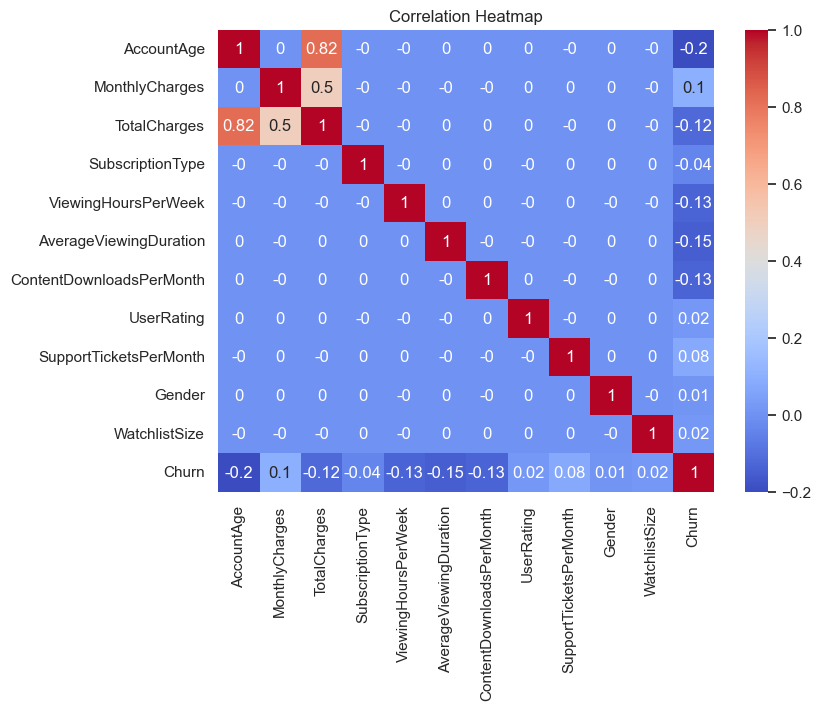

In [16]:
df_churn_numeric = df_churn.select_dtypes([float,int])

plt.figure(figsize=(8,6))
sns.heatmap(df_churn_numeric.corr().round(2), annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# I opted to round the output on the correlation heatmap because many of the variables had tiny correlations (e.g. -0.004).

The heatmap suggests that Account Age, Average Viewing Duration, Viewing Hours per Week and Content Downloads per Month have the most impact on churn status.

However, again, these are small correlations.

Now I will examine the linear regressions for those 4 variables.

In [ ]:
# For any value x, use y = mx + c to return y
# This basically means - when given the slope and intercept (forms the line), and an x value, what would y be?
# x will be the variables that I pass in, m and c will be obtained using linear regression function
def best_fit(x):
    return slope * x + intercept

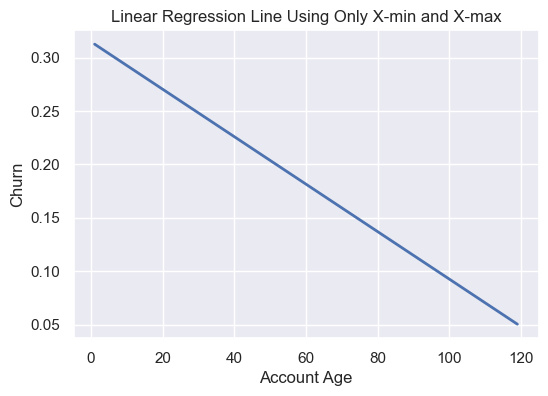

Slope: -0.0022216605805559565
Intercept: 0.31471769275849026
Correlation: -0.19773563199738664


In [18]:
# Account Age

a = df_churn['AccountAge']
b = df_churn['Churn']

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(a,b)

# Pick just the min and max x-values
x_min, x_max = a.min(), a.max()
y_min, y_max = best_fit(x_min), best_fit(x_max)

# Plot
plt.figure(figsize=(6,4))
plt.plot([x_min, x_max], [y_min, y_max], linewidth=2)

plt.xlabel("Account Age")
plt.ylabel("Churn")
plt.title("Linear Regression Line Using Only X-min and X-max")
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation:", r)


In [19]:
# Average Viewing Duration

a = df_churn['AverageViewingDuration']
b = df_churn['Churn']

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(a,b)

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation:", r)

Slope: -0.0011204021312141274
Intercept: 0.2846048278015778
Correlation: -0.14689656866608689


In [20]:
# Viewing Hours per Week 

a = df_churn['ViewingHoursPerWeek']
b = df_churn['Churn']

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(a,b)

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation:", r)

Slope: -0.004407371775224177
Intercept: 0.27159270226542487
Correlation: -0.12864480603914336


In [21]:
# Content Downloads per Month

a = df_churn['ContentDownloadsPerMonth']
b = df_churn['Churn']

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(a,b)

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation:", r)

Slope: -0.0034658660383073817
Intercept: 0.26615787170498195
Correlation: -0.12975187419254752
